<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/03-Conjuntos-Entrenamiento-Prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicia &bull; Conjuntos de Entrenamiento y Prueba
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2024-02
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este notebook está diseñado para explorar ka división de conjuntos de datos. Utilizaremos el conjunto de datos. Los objetivos principales son:

- Dividir conjuntos de datos en entrenamiento y prueba.
- Analizar cómo se distribuyen las clases en estos conjuntos.
- Examinar métodos de validación cruzada.


Los paquetes necesarios son:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
import matplotlib.pyplot as plt

---
## <font color='264CC7'> Lectura de datos </font>


Leemos el conjunto de datos y mostramos las primeras filas.

In [2]:
# Cargar el conjunto de datos
url = 'https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv'
df = pd.read_csv(url)
# Seleccionar las columnas de interés
columns = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price']
df = df.loc[:, columns]
df.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1.00,1180,5650,1.0,221900.0
1,3,2.25,2570,7242,2.0,538000.0
2,2,1.00,770,10000,1.0,180000.0
3,4,3.00,1960,5000,1.0,604000.0
4,3,2.00,1680,8080,1.0,510000.0
5,4,4.50,5420,101930,1.0,1225000.0
6,3,2.25,1715,6819,2.0,257500.0
7,3,1.50,1060,9711,1.0,291850.0
8,3,1.00,1780,7470,1.0,229500.0
9,3,2.50,1890,6560,2.0,323000.0


---
## <font color='264CC7'> Características y etiquetas </font>

Ahora, separamos las características y las etiquetas.

![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/6_train-test-split.jpg)

In [3]:
# Dividir el conjunto de datos en características y etiquetas
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']
X = df.loc[:, features]
y = df.loc[:, ['price']]

---
## <font color='264CC7'> Conjunto de entrenamiento y prueba </font>

Con esto, dividimos los datos en dos conjuntos: uno para entrenamiento y otro para prueba.

![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/7_train-test-split.jpg)

In [8]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Ahora, visualizamos el tamaño de los conjuntos de entrenamiento y prueba.

In [9]:
# Reviso las dimensiones de los conjuntos de datos
print('Dimensiones de los conjuntos de datos:')
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

Dimensiones de los conjuntos de datos:
X_train: (17290, 5)
y_train: (17290, 1)
X_test: (4323, 5)
y_test: (4323, 1)


Para visualizar la distribución de las clases en los conjuntos de entrenamiento y prueba, utilizamos un histograma.

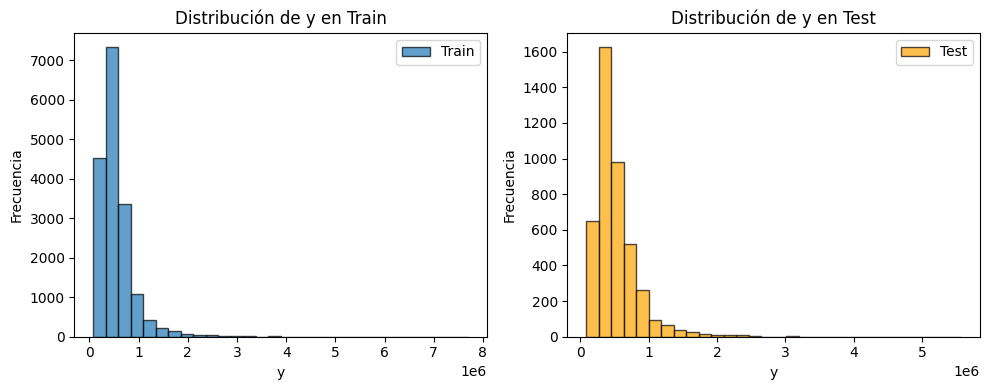

In [12]:
# Grafico la distribución de las clases en el conjunto de entrenamiento y prueba
plt.figure(figsize=(10, 4))

# Histograma para y_train
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, alpha=0.7, edgecolor='black', label='Train')
plt.title('Distribución de y en Train')
plt.xlabel('y')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma para y_test
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=30, alpha=0.7, edgecolor='black', label='Test', color='orange')
plt.title('Distribución de y en Test')
plt.xlabel('y')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()
